# FlavorWiki Test

The goal of any business is to make a profit. To achieve such a goal in our globalized world, every manufacturer shall listen to the consumers. 
A short study is made on WiKiFlavor dataset, in which observation on 5 different products (A, B, C, D, E) from 1000 different consumers are collected. 

**The purpose of this study** is to explore available data and find eventual insights on the products for their manufacturers.
It  will include the following steps:
* data overview and preprocessing 
* EDA
* statistical analysis

## Data Overview and Preprocessing



In [28]:
import pandas as pd  # importing pandas
import seaborn as sns # importing seaborn 
from scipy import stats as st # importing stats functions 
import seaborn as sns # importing seaborn for plotting
import matplotlib.pyplot as plt  # importing matplotlib for plotting
%matplotlib inline
import warnings # importing warnings to avoid them
warnings.simplefilter("ignore")

Let's make the first representation about the data:

In [29]:
# reading csv file and saving to df
try:
    df = pd.read_csv("flavorwiki.csv")
except:
     print('File not found') # if the path is not correct, an error message will be printed

In [30]:
df.shape # getting general information on df

(1000, 34)

As far as we can see, the dataset contains 1000 observations and 34 features, we shall check the data quality further as well as optimize the columns name, to make it easier to analyze the data.

In [31]:
# renaming the columns with the appropriate names
df.columns = ['id', 'product', 'gender', 'gender_value', 'age', 'age_value', 'packaging_mark', 
              'packaging_mark_value', 'fun_score', 'convenient_score', 'familiar_score','cheap_score', 
              'boring_score', 'indifferent_score', 'plain_score', 'premium_score', 'buy_score', 
              'buy_score_value', 'appearance', 'appearance_value', 'seasoning',
              'seasoning_value', 'overall_mark', 'overall_mark_value', 'like_flavor', 'like_flavor_value', 
              'flavor_mark', 'flavor_mark_value', 'texture_mark', 'texture_mark_value', 'aftertaste_mark',
              'aftertaste_mark_value', 'buy_again', 'buy_again_value'
             ]

Next we will check the data for missing values and full duplicates that may negatively influence the results of our study:

In [32]:
df.isna().mean() # checking the percentage of missing values in each column

id                       0.000
product                  0.000
gender                   0.000
gender_value             0.000
age                      0.000
age_value                0.000
packaging_mark           0.000
packaging_mark_value     0.000
fun_score                0.000
convenient_score         0.000
familiar_score           0.000
cheap_score              0.000
boring_score             0.000
indifferent_score        0.000
plain_score              0.000
premium_score            0.000
buy_score                0.000
buy_score_value          0.000
appearance               0.000
appearance_value         0.000
seasoning                0.000
seasoning_value          0.000
overall_mark             0.098
overall_mark_value       0.098
like_flavor              0.000
like_flavor_value        0.000
flavor_mark              0.000
flavor_mark_value        0.000
texture_mark             0.000
texture_mark_value       0.000
aftertaste_mark          0.000
aftertaste_mark_value    0.000
buy_agai

We have roughtly 10% of missing data regarding the overall mark and around 9% of such values in the 'buy_again' columns. Let's check if missing values in these 4 columns are somehow related:

In [33]:
len(df[df['buy_again'].isna()&df['overall_mark'].isna()][['buy_again','overall_mark']]) # checking for relations about missing values

15

We could not find an evident relation regarding the missing values, since only 15 observations miss the answers for all 4 columns. Either some respondents did not answer some questions or there was a bug in the further data entry/dowloading.

In [34]:
df.duplicated().sum() # checking the dataset for full duplicates

0

***Conclusions***
As a result of data overview, we found out that essentially our data is a set of answers on 18 questions concerning the products received by 1000 respondents. Almost all questions repeat 2 times, and the answers are given in descriptive and mark values ways. Each respondent is unique and we have information about age, group and gender on them.
We can state that the quality of the data is rather good: data types comply with the columns. there are no full duplicates, missing values are present in 4 out of 34 colums but their share (under 10%) is not critical, therefore we will not further preprocess them.

## Exploratory Data Analysis

We already found out about the dataset structure, now it's time to explore the contents of each features. First of all, we  shall have a look at unique values: this will help us to figure out the values range as well as to check for eventual anomalies.

In [35]:
# visualizing unique values per colums
for col in df.drop(['id'], axis=1).columns:
    print(f'{col} the unique values are {df[col].unique()}')

product the unique values are ['A' 'B' 'C' 'D' 'E']
gender the unique values are ['Female' 'Male']
gender_value the unique values are [2 1]
age the unique values are ['35-44' '45-55' '18-34' '56-64']
age_value the unique values are [3 4 2 5]
packaging_mark the unique values are ['Neither Like nor Dislike (5)' 'Like Very Much (8)' 'Like Extremely (9)'
 'Like Moderately (7)' 'Dislike Slightly (4)' 'Like Slightly (6)'
 'Dislike Moderately (3)' 'Dislike Extremely (1)']
packaging_mark_value the unique values are [5 8 9 7 4 6 3 1]
fun_score the unique values are [8 7 6 9 5 3 4 2]
convenient_score the unique values are [7 5 6 3 8 9 4 2]
familiar_score the unique values are [3 6 8 7 2 4 5 9 1]
cheap_score the unique values are [7 3 5 2 1 6 4 8]
boring_score the unique values are [3 2 4 6 1 7 5 8]
indifferent_score the unique values are [3 4 5 6 8 7 2 1 9]
plain_score the unique values are [4 3 6 5 7 8 2 9 1]
premium_score the unique values are [5 7 3 4 6 2 8 1 9]
buy_score the unique values ar

In [36]:
df['product'].value_counts() # checking the number of observations per product

A    200
B    200
C    200
D    200
E    200
Name: product, dtype: int64

Generally speaking, no anomalous value was detected.
We can state that the data is collected for 5 products, and the products were assessed both by females and males of 4 age groups from 18 to 64 years. The observations are divided evenly per product.
We are also observing two scales from min to max as follows: from 1 to 5 for seasonality and purchase-matter questions and a widely used for food assessment hedonic scale from 1 to 9 for all other features.
Since many columns have the same information, let's make our dataset less redundant:

In [37]:
# dropping redundant columns
df.drop(['gender_value', 'age_value','packaging_mark', 'buy_score', 'appearance', 'overall_mark','seasoning_value', 
         'like_flavor', 'flavor_mark_value', 'texture_mark_value', 'aftertaste_mark_value', 'buy_again'], axis=1, inplace=True)

Just a few words about our respondents: let's see the splits by gender and age and whether this somehow influeneces the products' scores. Let's test the overall score feature:

In [38]:
 df['gender'].value_counts()/len(df)*100 # the percentage of respondents by gender

Female    86.5
Male      13.5
Name: gender, dtype: float64

In [39]:
df['age'].value_counts().sort_values(ascending=False)/len(df)*100 # the percentage of respondents by age group

35-44    35.8
18-34    33.7
45-55    23.7
56-64     6.8
Name: age, dtype: float64

In [40]:
df.groupby(['gender', 'age'])['overall_mark_value'].mean() # average overall score by gender and age group

gender  age  
Female  18-34    7.501859
        35-44    7.075601
        45-55    7.327778
        56-64    7.095238
Male    18-34    7.175000
        35-44    6.848485
        45-55    6.333333
        56-64    6.411765
Name: overall_mark_value, dtype: float64

Women higly prevail among respondents, while the age groups are divided evenly, with the exception of the senior people.
We can also state that on average, young women give higher scores to the products, while senior males give the least ones: the difference is quite significant.

Now let's move to the products which are the target of this study. We are going to hold on on the overall score, which seems to be one of the clue features and see how the main stats about it:

In [41]:
df['overall_mark_value'].describe() # checking the colums stats

count    902.000000
mean       7.212860
std        1.712762
min        1.000000
25%        7.000000
50%        8.000000
75%        8.000000
max        9.000000
Name: overall_mark_value, dtype: float64

It looks like there is nothing to worry about: the mean and median are not far one from another, if we plot a histogram it would be definitely biased to the right, which is rather positive for our products, since there are many high scores.
Since this study is just a review and there are many features in the dataset, let's concentrate on the most important amongst them: intuitive product features (i.e. appearance, packaging, flavor) and propensity to purchase before and after tasting: the last ones are crucial for manufacturers. We will also plot the features for a better understading.

In [42]:
# creating a pivot table with the main features
main_scores = df.pivot_table(index=['product'], values=['buy_score_value', 'overall_mark_value', 'buy_again_value', 
                                                       'packaging_mark_value', 'appearance_value', 'like_flavor_value',], 
                             aggfunc=['mean']).reset_index()  # creating a summary pivot for both ta

main_scores.columns = ['product', 'appearance', 'buy_again_value', 'buy_before_value', 'flavor', 'overall_score', 'packaging']
column_order = ['product', 'appearance', 'packaging', 'flavor', 'overall_score', 'buy_before_value',  'buy_again_value']
main_scores = main_scores.reindex(column_order, axis=1)

In [43]:
main_scores.head() # visualizing the result

,product,appearance,packaging,flavor,overall_score,buy_before_value,buy_again_value
0,A,7.730,7.660,7.570,7.480874,3.810,3.938202
1,B,7.655,7.215,7.210,7.204420,3.970,4.048387
2,C,7.465,7.695,7.215,7.158470,3.380,3.551913
3,D,7.960,7.605,7.595,7.505618,4.155,4.285714
4,E,7.400,7.400,6.700,6.706215,3.160,3.184783


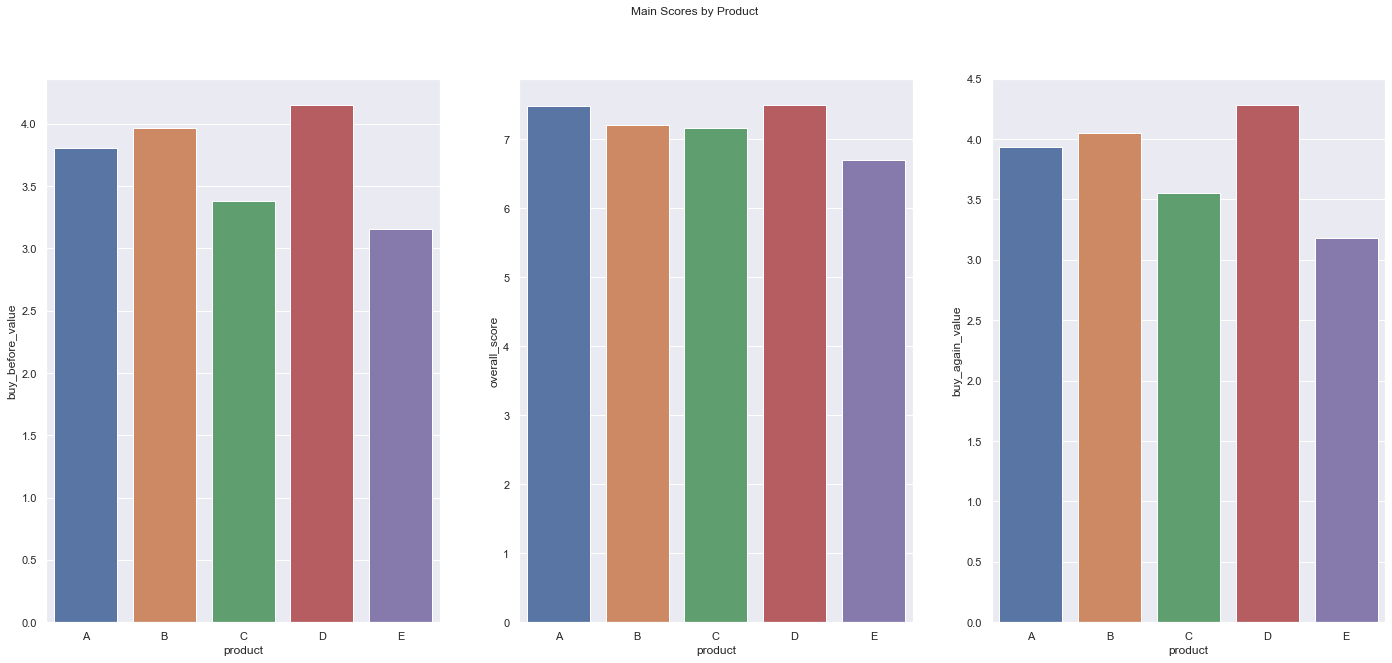

In [44]:
# plotting the barplots on average values: buy-before, overall_score and buy-after
fig, axes = plt.subplots(1, 3, figsize=(24, 10))
sns.barplot(data=main_scores, x=main_scores['product'], 
            y=main_scores['buy_before_value'], ax=axes[0])
sns.barplot(data=main_scores, x=main_scores['product'],  y=main_scores['overall_score'], 
            ax=axes[1])
sns.barplot(data=main_scores, x=main_scores['product'],  y=main_scores['buy_again_value'], 
            ax=axes[2])
fig.suptitle('Main Scores by Product');

Even if the difference among the 5 products as far as it regards the mean values is not so huge, we can clearly see that we have a "winner", which is product D, and an 'outsider', which is product E. A, B and C shift among themselves. Such trend is visible as far as it regards the propensity to buy before and after tasting as well as the overall score.

Futher, let's analyze the difference in appearance, packaging and flavor among the 5 products, pie and donut charts will help us with it. We will check the split by the worst (1,2,3) and the best marks (7,8,9):

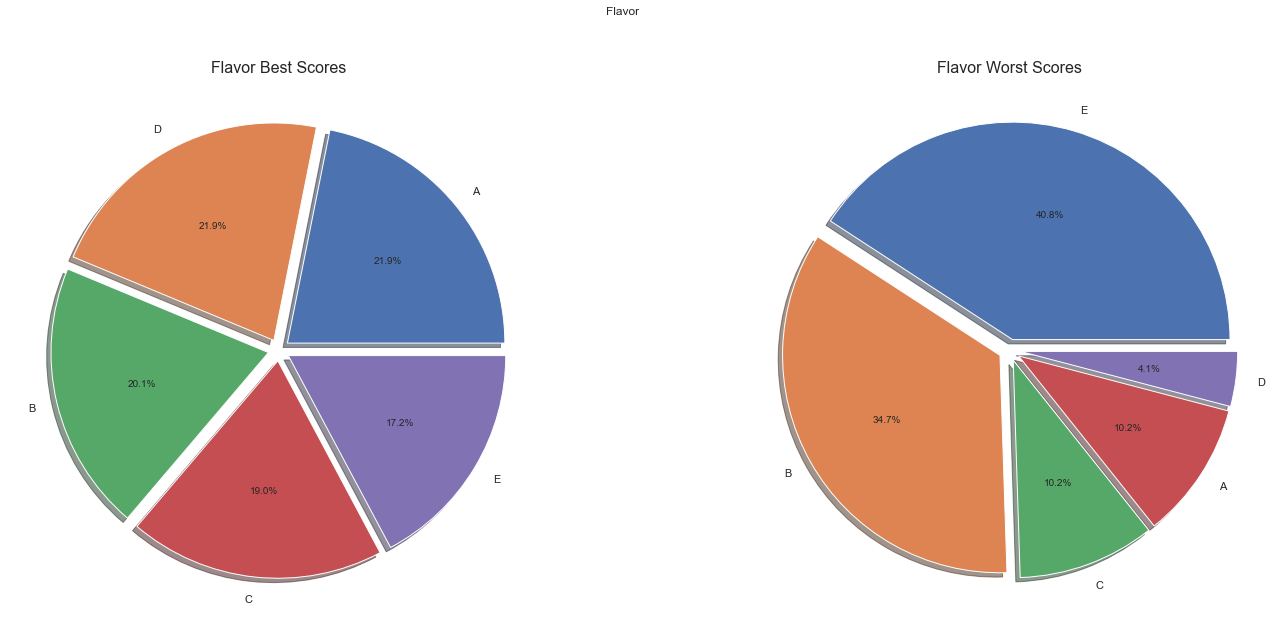

In [45]:
# plotting pie diagrams on flavor assessment

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
axes[0].pie(df[df['like_flavor_value'].isin([7,8,9])]['product'].value_counts(), shadow=True,  radius=1,
    explode=(0.05, 0.05, 0.05, 0.05, 0.05), labels=df[df['like_flavor_value'].isin([7, 8,9])]['product'].value_counts().index, autopct='%1.1f%%')
axes[1].pie(df[df['like_flavor_value'].isin([1,2,3])]['product'].value_counts(), shadow=True, radius=1, 
            explode=(0.05, 0.05, 0.05, 0.05, 0.05), labels=df[df['like_flavor_value'].isin([1,2,3])]['product'].value_counts().index, autopct='%1.1f%%')
axes[0].set_title('Flavor Best Scores', fontsize = 16)
axes[1].set_title('Flavor Worst Scores', fontsize = 16)
fig.suptitle('Flavor');

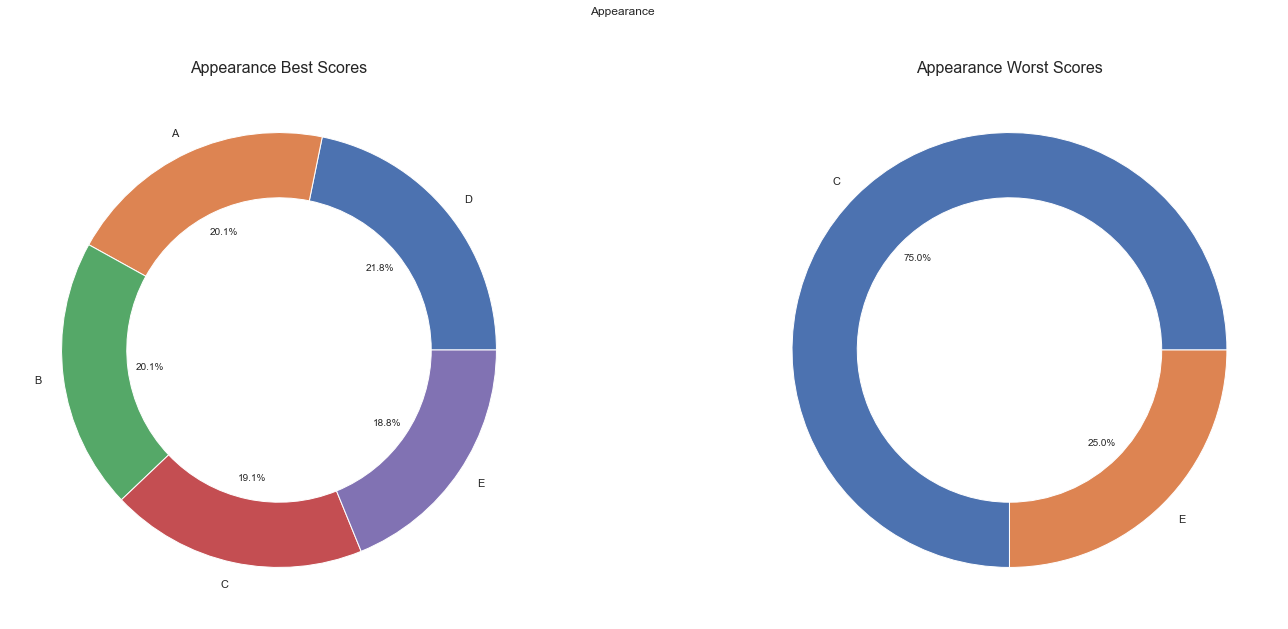

In [46]:
# plotting donut diagrams on appearance assessment
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
axes[0].pie(df[df['appearance_value'].isin([7,8,9])]['product'].value_counts(), 
            labels=df[df['appearance_value'].isin([7,8,9])]['product'].value_counts().index, autopct='%1.1f%%', wedgeprops={'width':0.3})
axes[1].pie(df[df['appearance_value'].isin([1,2,3])]['product'].value_counts(), 
            labels=df[df['appearance_value'].isin([1,2,3])]['product'].value_counts().index, autopct='%1.1f%%', wedgeprops={'width':0.3},)
axes[0].set_title('Appearance Best Scores', fontsize = 16)
axes[1].set_title('Appearance Worst Scores', fontsize = 16)
fig.suptitle('Appearance');

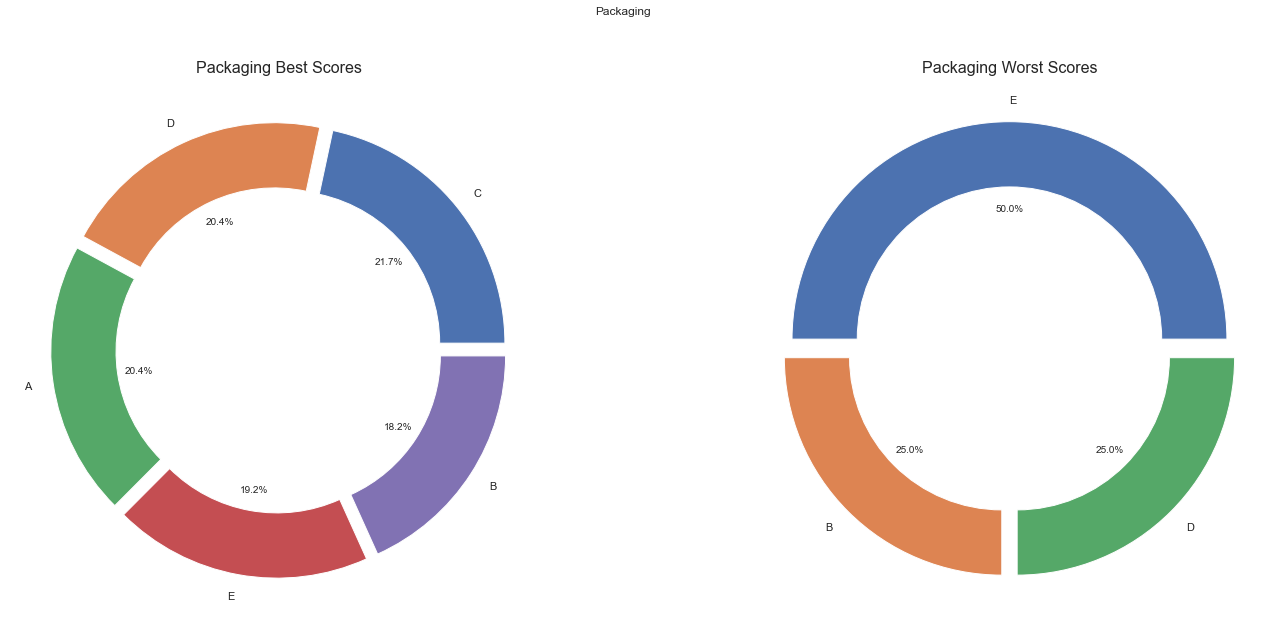

In [47]:
# plotting pie diagrams on packaging assessment
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
axes[0].pie(df[df['packaging_mark_value'].isin([7,8,9])]['product'].value_counts(), explode=(0.05, 0.05, 0.05, 0.05, 0.05),
            labels=df[df['packaging_mark_value'].isin([7,8,9])]['product'].value_counts().index, autopct='%1.1f%%', wedgeprops={'width':0.3})
axes[1].pie(df[df['packaging_mark_value'].isin([1,2,3])]['product'].value_counts(), explode=(0.05, 0.05, 0.05),
            labels=df[df['packaging_mark_value'].isin([1,2,3])]['product'].value_counts().index, autopct='%1.1f%%', wedgeprops={'width':0.3},)
axes[0].set_title('Packaging Best Scores', fontsize = 16)
axes[1].set_title('Packaging Worst Scores', fontsize = 16)
fig.suptitle('Packaging');

After having analyzed the diagrams, we can state that the best scores for all three features are distributed evenly among the 5 products, while the worst scores do not: for instance, A, B, D products have no low appearance scores, A and C have only medium and high packaging scores. Flavor assesment is various but the low scores are not distributed evenly.
Thus, we can deduce that being the winner for the product D and being the outsider for the product E is due to the fact, that the former received exclusively high scores, while the latter received almost the same percentage of high scores as well as a huge amount of low scores. Thus, the consumers do not have a shared vision regarding the product E.

It would be logical to suppose that the single features assessment influences the overall score. Let's check how they correlate.

In [48]:
df[['like_flavor_value', 'packaging_mark_value', 'appearance_value', 'buy_score_value']].corr() # cheching for correlation among the features

,like_flavor_value,packaging_mark_value,appearance_value,buy_score_value
like_flavor_value,1.000000,0.404912,0.477340,0.483996
packaging_mark_value,0.404912,1.000000,0.493989,0.311488
appearance_value,0.477340,0.493989,1.000000,0.454259
buy_score_value,0.483996,0.311488,0.454259,1.000000


In [49]:
df[['like_flavor_value', 'packaging_mark_value', 'appearance_value', 'overall_mark_value']].corr() # cheching for correlation among the features

,like_flavor_value,packaging_mark_value,appearance_value,overall_mark_value
like_flavor_value,1.000000,0.404912,0.477340,0.890115
packaging_mark_value,0.404912,1.000000,0.493989,0.391236
appearance_value,0.477340,0.493989,1.000000,0.453442
overall_mark_value,0.890115,0.391236,0.453442,1.000000


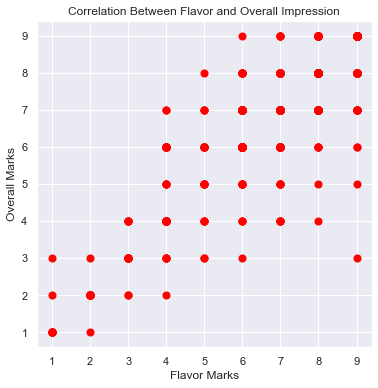

In [50]:
# plotting a scatter plot for flavor and overall score
ax = df.plot(x='like_flavor_value', y='overall_mark_value', kind='scatter', color='red', grid=True,  figsize=(6,6), 
             title='Correlation Between Flavor and Overall Impression', xlabel='Flavor Marks', 
             ylabel='Overall Marks', s=50);

Before tasting, it would be logical to think that a product assesment shall correlate a lot with the packaging and appearance but seems like our respondents do not rely too much on these two features: there is a moderate positive correlation between the before-tasting score and them but we observe it also with the flavor, which was unknown before tasting.
As expected, there is a positive high correlation between flavor and overall score: in roughly 89% of cases whther a product got high flavor score, it also got an overall high score. This is clearly visible on the scatter plot above. This seems to be logical: since we are speaking about food after tasting this feature is likely to be determinant for the overall assessment. 
Flavor factor has been positive for all products: looking back and comparing average scores before and after tasting we may notice the the latter scores are higher.
Next let's analyze the crucial feature for us, repurchase scores:

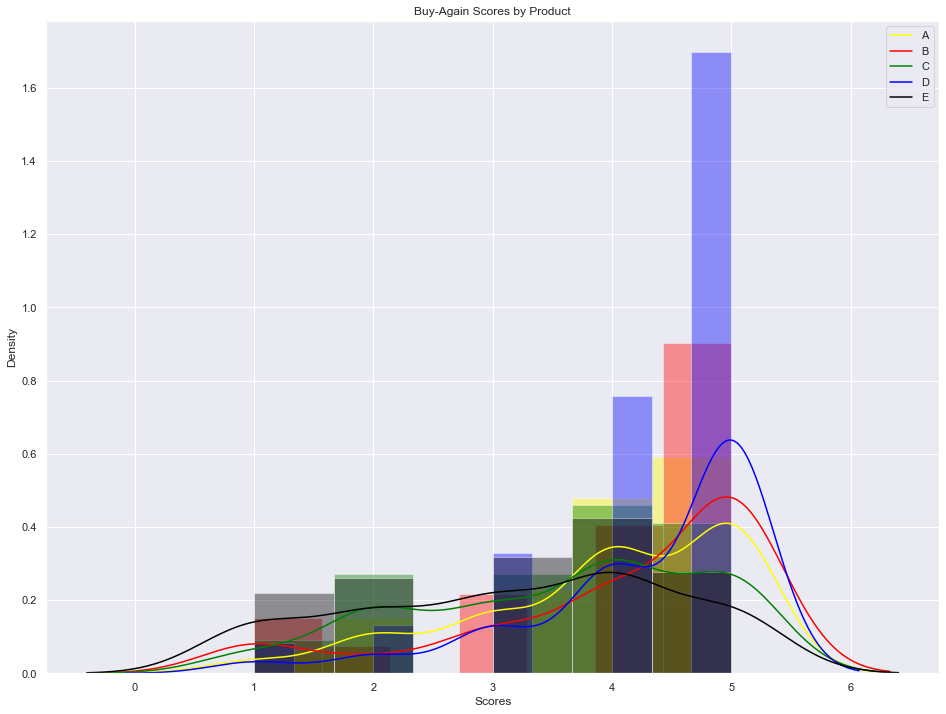

In [51]:
# plotting re-purchase trends per product
sns.set(rc = {'figure.figsize':(16, 12)})
sns.distplot(df[df['product']=='A']['buy_again_value'], color='yellow')
sns.distplot(df[df['product']=='B']['buy_again_value'], color='red')
sns.distplot(df[df['product']=='C']['buy_again_value'], color='green')
sns.distplot(df[df['product']=='D']['buy_again_value'], color='blue')
sns.distplot(df[df['product']=='E']['buy_again_value'], color='black')
plt.xlabel('Scores') 
plt.title('Buy-Again Scores by Product')
plt.legend(labels=['A', 'B', 'C', 'D', 'E']); 

The distplot trends confirm what we said before: D product was assessed the highest and E product the lowest. In the middle there a B, A and C products.
Since we do not have an additional information on the products, we could imagine two situations:
* pruducts are manufactured by 5 different manufacturers, and in such case there are good news for the D manufacturer and bad ones for the E manufacturer.
* products are produced by the same manufacturer, and if there is only one to choose/discharge it should be D and E products accordingly.

**Conclusions**
As a result of EDA, we found out that assessment scores are influenced by the age group and gender of respondents. We analyzied the scores of the main features, which seem consistent in terms of each product, found the leader and the outsider in our respondent's opinion as well as revelaed some significant positive correlations among the data.

## Statistical Analysis

As usual in this study we don't have a way to analyze the whole general population of the consumers, we have seen only a sample of them made of 1000 respondents.
Are our conclusions valid for the general population? Let's check this with the help of a statistical test. Thanks to the 
central limit theorem, which states that sample means are basically normally distributed as long as the sample size is at least 30, we may try to perform a t-test to check 2 a pair of hypotheses:
 - H0: The average consumer scores of the D and E products are equal;
 - H1: The average consumer scores of the D and E products differ.

Our task is to compare the means of two independent populations based on the samples, so we will use the `scipy.stats.ttest_ind()` method, where the `equal_var = False` parameter, since the samples are of different sizes and there is no certainty that their variances are equal.

In [52]:
D = df[df['product']=='D']['buy_again_value'].dropna() # selecting the D sample
len(D) # checking if the sample size is enough for t-test

182

In [53]:
E = df[df['product']=='E']['buy_again_value'].dropna() # selecting the E sample
len(E) # checking if the sample size is enough for t-test

184

In [54]:
alpha = 0.05 # setting a significance level
results = st.ttest_ind(D, E, equal_var = False) #  testing the hypotesis on equality of two independent populations means
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 2.5306937693832786e-17
Rejecting the null hypothesis


**Conclusions**
T-test basically confirmed the results of EDA performed on the dataset: general population of consumers would assess D and E products in different ways, and would like D product the most. Thus, if we need to choose 1 out of A, B, C, D, E our choice would be the D products

## Study Results
In this quick study we analyzed the given dataset on  assessment of 5 different products by 1000 people, taking into consideration various aspects of these products.
We managed to reveal difference in assessment scores based on gender and age group of the respondents, correlation among the features sometimes, as well as compare more features' scores by product.
The conclusion confiremd by the statistical test is that our winner is product D which gained the highed scores, while our outsider is the product E. For this reason, whether we have to choose or discharge only one product it should be D and E products accordingly.